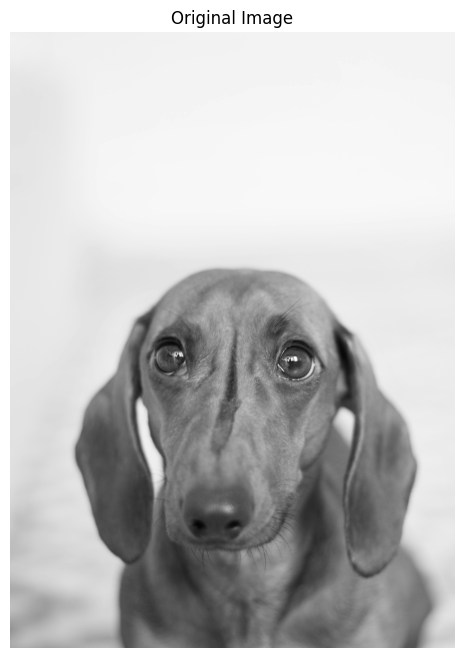

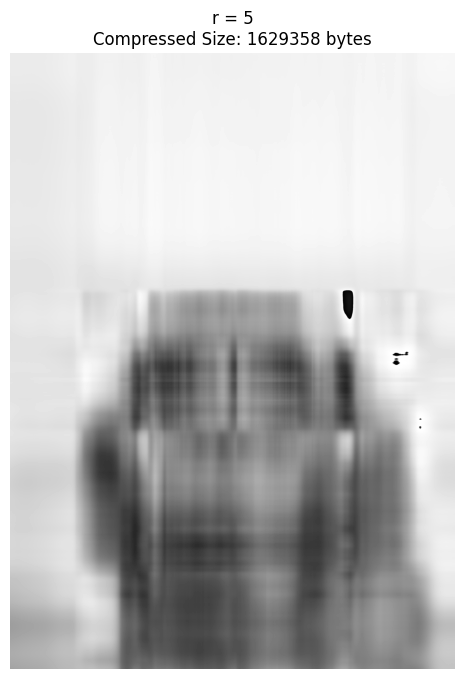

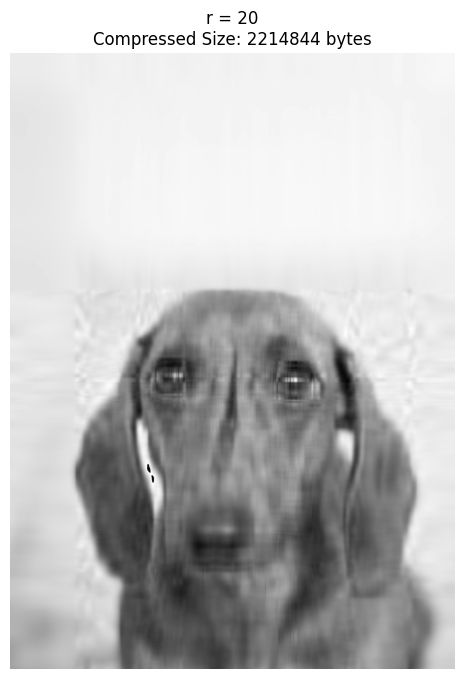

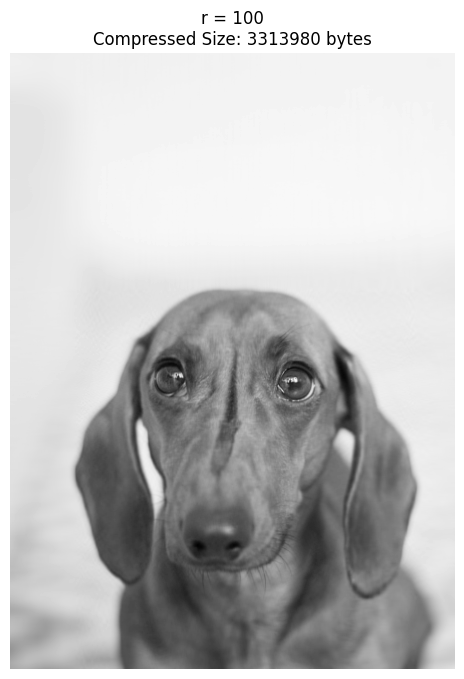

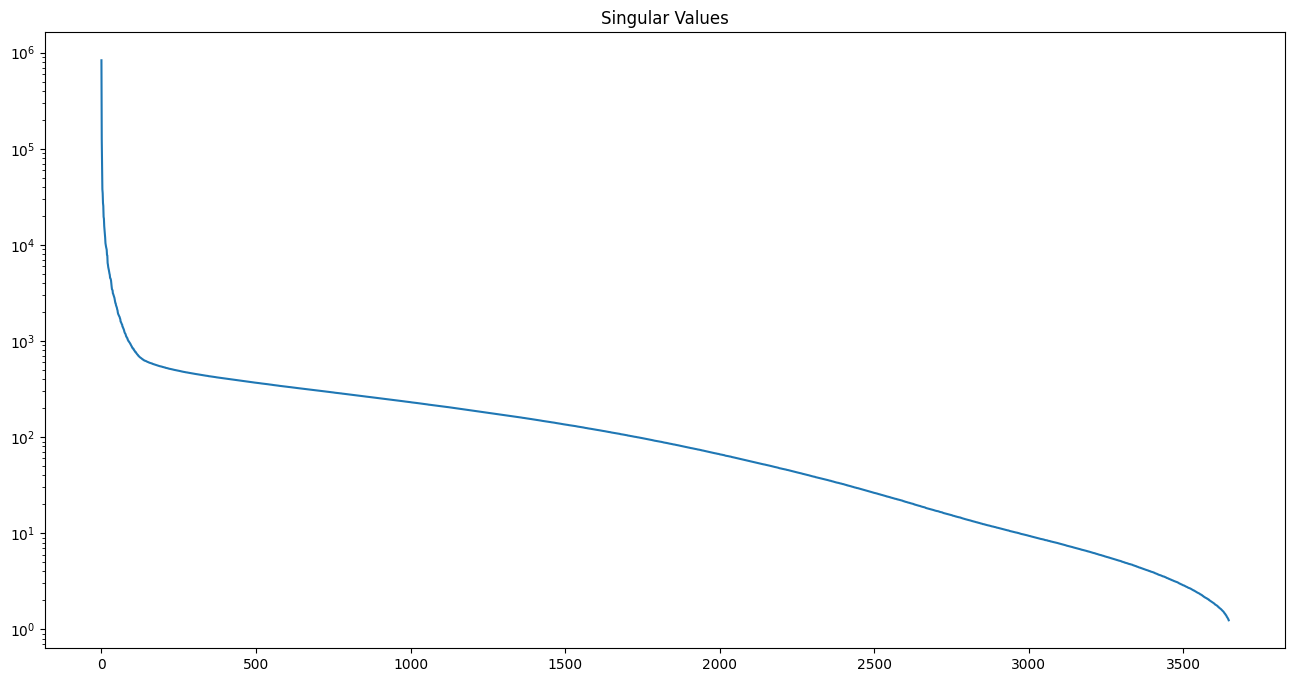

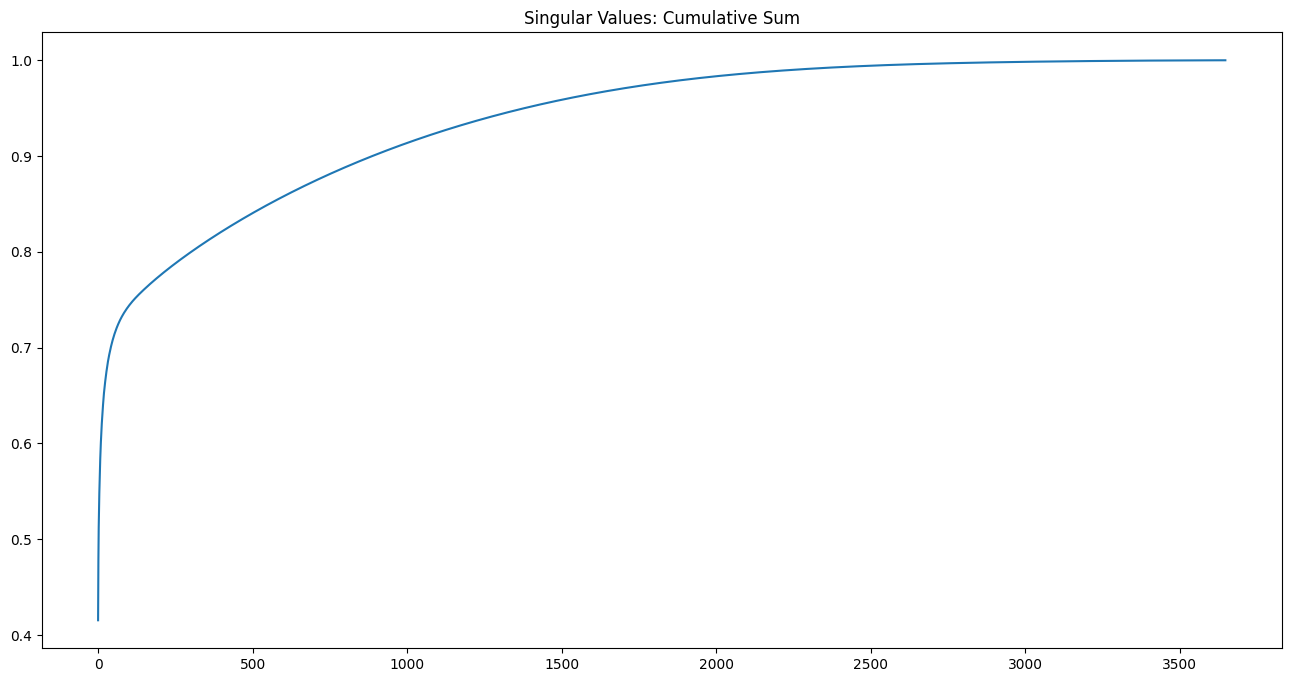

Original Image Size: 18429696 bytes


In [9]:
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt

# Open the image using Pillow
image_path = "Dog.jpg"  # Replace with the actual path of your image
image = Image.open(image_path)

# Convert the image to grayscale
X = np.array(image.convert("L"))

# Display the original image
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(X, full_matrices=False)
# U is a m * m unitary matrix
# S is an m * n rectangular diagonal matrix
# V is a n * n unitary matrix and VT is the conjugate transpose of V
S = np.diag(S)

# Calculate original size
original_size = X.nbytes  # Size of original image in bytes

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    
    # Convert the reconstructed array to an image
    compressed_image = Image.fromarray(Xapprox.astype(np.uint8))
    
    # Calculate compressed image size
    compressed_image_bytes = io.BytesIO()
    compressed_image.save(compressed_image_bytes, format='PNG')
    compressed_size = compressed_image_bytes.getbuffer().nbytes
    
    # Display the compressed image
    plt.imshow(compressed_image, cmap='gray')
    plt.axis('off')
    plt.title('r = ' + str(r) + '\nCompressed Size: ' + str(compressed_size) + ' bytes')
    plt.show()

    
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()
# Display the original image size
print(f"Original Image Size: {original_size} bytes")

